# Question 1

#### Use Boston datase from sklearn package. Design a linear regression model to estimate the number of rooms in the house using other features specified in the dataset.  

#### Load and analyse data 

In [1]:
#import common necessary libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#import the boston dataset from sklearn 

from sklearn.datasets import load_boston 

In [3]:
# load the dataset and do some simple analysis to understand the dataset 

boston = load_boston()
print("Shape of data :", boston.data.shape)
print("Shape of target :", boston.target.shape)
print("feature names :", boston.feature_names)
print("Description :", boston.DESCR)

Shape of data : (506, 13)
Shape of target : (506,)
feature names : ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Description : .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five 

In [4]:
boston_data = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_data = pd.concat([boston_data, pd.Series(boston.target,name = "MEDV")], axis = 1)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


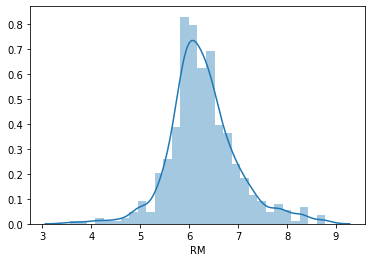

In [5]:
# some data exploration 

boston_data.describe()
sns.distplot(boston_data['RM'], bins = 30)

In [6]:
# some correlation analysis 

corr = boston_data.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### Train model 

In [7]:
# choose columns with 0.3 or -0.3 and above correlation as X

X = boston_data[['ZN', 'INDUS', 'NOX', 'PTRATIO', 'LSTAT','MEDV']]
y = boston_data['RM']

In [8]:
X.head()

,ZN,INDUS,NOX,PTRATIO,LSTAT,MEDV
0,18.0,2.31,0.538,15.3,4.98,24.0
1,0.0,7.07,0.469,17.8,9.14,21.6
2,0.0,7.07,0.469,17.8,4.03,34.7
3,0.0,2.18,0.458,18.7,2.94,33.4
4,0.0,2.18,0.458,18.7,5.33,36.2


In [9]:
y.head()

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

In [10]:
# import train_test_split library 

from sklearn.model_selection import train_test_split

In [11]:
# Training and testing sets - 80:20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# import linear regression 

from sklearn.linear_model import LinearRegression

In [13]:
# instantiate 

lin_reg = LinearRegression()

In [14]:
# train the model 

lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# print results 

print(lin_reg.intercept_)
print(lin_reg.coef_)
cdf = pd.DataFrame(lin_reg.coef_, X.columns, columns = ['Coeff'])
cdf

4.622604906443403
[ 0.00291958 -0.00929569  1.27623566  0.02053674 -0.02342906  0.04233408]


,Coeff
ZN,0.002920
INDUS,-0.009296
NOX,1.276236
PTRATIO,0.020537
LSTAT,-0.023429
MEDV,0.042334


#### Make prediction and test the model 

In [16]:
# import the necessary performance mesure libraries 

from sklearn import metrics

In [17]:
# prediction 

prediction = lin_reg.predict(X_test)

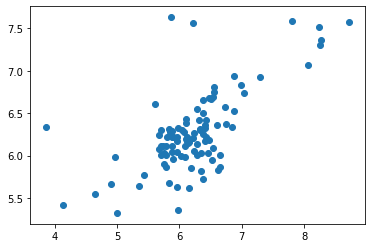

In [18]:
plt.scatter(y_test, prediction)

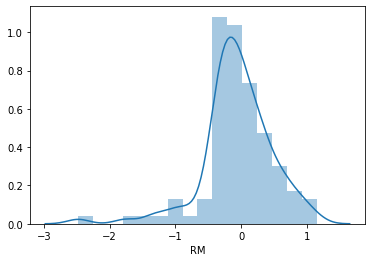

In [19]:
sns.distplot((y_test - prediction))

In [20]:
# performance measures 

print("MSE :", metrics.mean_squared_error(y_test,prediction))
print("MAE :", metrics.mean_absolute_error(y_test, prediction))
print("RMSE :", np.sqrt(metrics.mean_absolute_error(y_test, prediction)))

MSE : 0.292939394792284
MAE : 0.37985358125091234
RMSE : 0.6163226275668551


In [21]:
print("r2_score :", metrics.r2_score(y_test, prediction))

r2_score : 0.4489856290370726


# Explantion
    
Two performance measures that can be used to assess the model are the MSE and the R-squared score. 

The Mean Squared Error (MSE) tells us how close a regression line is to a set of actual data points. A smaller MSE of 0.293 
from the model tells us that the data values are closer to the best fit line Which is good. Furthermore, a R-Sqaured score
0.449 reveals that 44.9% of the proportion of variance in the dependent variable(Number of rooms - RM) can be independent 
variable. 

Overall, the model is good but it is not acceptable to be used to deployed for predicting the number of rooms. Other more 
relevant inputs (independent variables) needs to used or an different algorthim such as decision tree or logit regression have
to tried out. 